### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import model_data as md
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


In [2]:
%load_ext autoreload
%autoreload 2

***

# 1) Load data into Python



In [3]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir("C:\\Users\\dexte\\sparklyRGT\\data") 

In [4]:
#CH01 must be loaded in separately to drop the forced choice session that was accidentally included
#for four rats

fnames2 = ['CH01_raw-free_S8-19.xlsx']

df2 = rgt.load_data(fnames2)
#drop forced choice session:
rgt.drop_sessions(df2, [6])
#reset the session numbers to start from 1:
rgt.edit_sessions(df2, orig_sess = list(range(8,20)),new_sess = list(range(1,13)))

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,1,1.1,...,0,0,0,1,4,0,0,0,0,0
1,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,1,1.1,...,0,0,0,1,1,0,0,0,0,0
2,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,1,1.1,...,0,0,0,1,5,0,0,0,0,0
3,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,1,1.1,...,0,0,0,1,5,0,0,0,0,0
4,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,1,1.1,...,0,0,0,1,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72643,rGT_B-cue,03/13/19,18:43:20,32,0,5,0,NaN,12,48.1,...,0,0,0,1,1,0,0,0,0,0
72644,rGT_B-cue,03/13/19,18:43:20,32,0,5,0,NaN,12,48.0,...,0,0,0,0,0,0,0,0,0,0
72645,rGT_B-cue,03/13/19,18:43:20,32,0,5,0,NaN,12,49.0,...,0,0,0,0,0,0,0,0,0,0
72646,rGT_B-cue,03/13/19,18:43:20,32,0,5,0,NaN,12,50.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#set these variables for extracting the data using the model_data python script

fnames = ['BH09_raw-free_S1-5_corrected.xlsx','CH02_raw-free_S8-15.xlsx','NA01_raw_free-choice_S8-18.xlsx']
#change these to the names of the excel files that you want to run modeling on 

#load in excel files into one df, resetting the session numbers to start at 1
df1 = rgt.load_multiple_data(fnames, reset_sessions = True)



In [6]:
rgt.check_sessions(df1)

Subject  StartDate            Session
101      2021-06-29 00:00:00  1          104.0
         2021-06-30 00:00:00  2          155.0
         2021-07-01 00:00:00  3          137.0
         2021-07-02 00:00:00  4          128.0
         2021-07-05 00:00:00  5          128.0
102      2021-06-29 00:00:00  1          102.0
         2021-06-30 00:00:00  2          129.0
         2021-07-01 00:00:00  3           83.0
         2021-07-02 00:00:00  4          112.0
         2021-07-05 00:00:00  5           75.1
103      2021-06-29 00:00:00  1           57.0
         2021-06-30 00:00:00  2           84.0
         2021-07-01 00:00:00  3           62.0
         2021-07-02 00:00:00  4           57.0
         2021-07-05 00:00:00  5           58.0
104      2021-06-29 00:00:00  1           75.0
         2021-06-30 00:00:00  2           70.0
         2021-07-01 00:00:00  3           77.1
         2021-07-02 00:00:00  4           46.0
         2021-07-05 00:00:00  5           58.0
105      2021-06-29 00

In [7]:
df = pd.concat([df1,df2], ignore_index = True)
rgt.check_sessions(df)

Subject  StartDate            Session
1        2003-01-19 00:00:00  5           72.0
         2003-04-19 00:00:00  6           81.0
         2003-05-19 00:00:00  7           94.1
         2003-07-19 00:00:00  8           78.0
         2003-08-19 00:00:00  9           83.0
         2003-11-19 00:00:00  10          49.1
         2003-12-19 00:00:00  11          53.0
         02/22/19             1           69.1
         02/25/19             2           85.0
         02/26/19             3           75.0
         02/27/19             4           83.0
         03/13/19             12         103.0
2        2003-01-19 00:00:00  5           72.1
         2003-04-19 00:00:00  6           80.1
         2003-05-19 00:00:00  7           88.0
         2003-07-19 00:00:00  8           92.1
         2003-08-19 00:00:00  9           71.0
         2003-11-19 00:00:00  10          99.0
         2003-12-19 00:00:00  11          99.1
         02/22/19             1           57.0
         02/25/19     

In [8]:
#creates lists of subjects run on each task (classic A, classic B, etc.)

#rename MSNs so that the rats on the outcome task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i, 'MSN'] == 'LossrGT_A-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_A'
    if df.at[i, 'MSN'] == 'LossrGT_B-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_B'
        
#rename MSNs so that the rats on the random task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i,'MSN'] == 'AnarchyrGT_B-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_B'
    if df.at[i,'MSN'] == 'AnarchyrGT_A-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_A'
        
        
task_list = df.groupby(['MSN'])['Subject'].unique()

MSN
LossRGT_A       [125, 117, 121, 151, 155, 101, 105, 135, 139, ...
MisrGT_A-cue                     [41, 43, 45, 47, 33, 35, 37, 39]
MisrGT_B-cue                     [42, 44, 46, 48, 34, 36, 38, 40]
RGT_ClassicA                                           [326, 330]
RGT_ClassicB                                           [325, 329]
RandomRGT_A     [119, 141, 153, 107, 131, 161, 302, 304, 306, ...
RandomRGT_B     [112, 124, 158, 146, 134, 164, 301, 303, 305, ...
RevRGT_A-cue                       [115, 127, 159, 149, 103, 137]
RevRGT_B-cue                       [120, 142, 154, 108, 132, 162]
lossRGT_A                                    [109, 113, 143, 147]
lossRGT_B       [110, 114, 126, 118, 122, 144, 148, 152, 156, ...
outcomeRGT_A    [116, 128, 160, 150, 104, 138, 209, 211, 225, ...
outcomeRGT_B    [111, 123, 157, 145, 133, 163, 210, 212, 226, ...
rGT_A-cue       [201, 205, 217, 221, 312, 316, 328, 332, 25, 2...
rGT_B-cue       [203, 207, 219, 223, 311, 315, 327, 331, 26, 2...
rGT_Cl

In [9]:
#these lines of code concatenates together the lists of subjects that run the same task (i.e., puts version A 
#and version B together) - based on unique string for each task name
uncued_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Classic' in task]])
standard_subs = np.concatenate((task_list['rGT_A-cue'], task_list['rGT_B-cue']))
#concatenating together MisRGT tasks, and RevRGT tasks, as they both refer to reverse-cue RGT
reverse_subs = np.concatenate((np.concatenate(task_list[[task for task in df.MSN.unique() if 'Mis' in task]]),
                              np.concatenate(task_list[[task for task in df.MSN.unique() if 'Rev' in task]])))
outcome_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'outcome' in task]])
random_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Random' in task]])
loss_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'oss' in task]])

subs = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

***
# 2A) Baseline & Acquisition Analysis


In [10]:
group_names = {0: 'uncued',
              1: 'cued',
              2: 'reverse',
              3: 'outcome',
              4: 'random', 
              5: 'loss'} 

group_list = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

title = 'Plot' #for plotting

startsess = 1 #first session you would like to include in figures
endsess = 5 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [ ]:
rgt.check_sessions(df)

### Drop/edit session numbers

In [ ]:
# df2 = rgt.drop_sessions(df, [6])
# df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [15], subs = "all")

### Check that you dropped/edited the desired session(s)

In [ ]:
# rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [11]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum 

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,prem3,prem4,prem5,prem6,prem7,prem8,prem9,prem10,prem11,prem12
1,37.6812,31.8841,10.1449,20.2899,30.9524,40.4762,13.0952,15.4762,21.6216,43.2432,...,31.192661,20.952381,13.253012,20.588235,19.827586,23.529412,26.548673,61.111111,55.833333,21.374046
2,22.807,52.6316,12.2807,12.2807,40,42.8571,10,7.14286,39.3443,40.9836,...,47.413793,37.398374,47.014925,43.571429,34.814815,27.200000,38.793103,27.737226,22.834646,27.343750
3,69.8795,13.253,8.43373,8.43373,80,11.8182,3.63636,4.54545,86.1702,8.51064,...,33.333333,36.956522,39.230769,31.168831,27.407407,36.206897,39.024390,43.925234,59.701493,50.694444
4,10,68.3333,18.3333,3.33333,6.60377,85.8491,5.66038,1.88679,14.1509,74.5283,...,15.200000,11.538462,43.624161,16.197183,7.453416,15.094340,20.754717,9.316770,7.534247,2.395210
5,58.2278,6.32911,12.6582,22.7848,68.6869,12.1212,8.08081,11.1111,54.7945,12.3288,...,45.112782,39.097744,60.283688,45.185185,35.000000,42.068966,47.887324,39.860140,44.966443,24.113475
6,23.6559,44.086,27.957,4.30108,13.1868,59.3407,26.3736,1.0989,36.4583,45.8333,...,30.935252,14.285714,24.358974,38.853503,17.419355,16.339869,13.218391,31.515152,30.635838,20.689655
7,55.4217,31.3253,4.81928,8.43373,44,40,5.33333,10.6667,55.2381,35.2381,...,34.782609,27.272727,38.815789,17.808219,8.888889,9.202454,14.634146,8.860759,10.674157,8.527132
8,27.2727,38.6364,23.8636,10.2273,31.7647,52.9412,4.70588,10.5882,39.2523,51.4019,...,30.519481,29.761905,35.260116,45.086705,21.965318,20.915033,19.277108,32.500000,32.098765,27.108434
9,59.5745,14.8936,4.25532,21.2766,71.4286,14.2857,3.1746,11.1111,87.6289,5.15464,...,41.916168,NaN,49.358974,32.432432,33.552632,50.370370,50.000000,45.512821,45.333333,48.051948
10,45.122,9.7561,18.2927,26.8293,46.0317,9.52381,22.2222,22.2222,52.7027,6.75676,...,28.846154,NaN,49.541284,31.818182,41.428571,33.898305,50.000000,48.666667,62.328767,27.814570


### Get the risk status of the rats


In [ ]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

### Export your data to an Excel file 


In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [12]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,prem3,prem4,prem5,prem6,prem7,prem8,prem9,prem10,prem11,prem12
uncued,39.7177,33.4047,15.0701,11.8076,42.1049,38.1285,10.5614,9.20517,42.8149,40.8082,...,28.0227,22.458,29.6231,24.65,23.0251,21.855,32.1376,27.561,29.7712,28.319
cued,32.3508,33.3322,18.4061,15.911,30.8003,35.0933,16.9034,17.203,28.0232,36.9881,...,31.2205,29.6074,33.8783,32.1835,33.7255,32.2708,35.7745,32.8765,30.9139,33.0943
reverse,34.5916,35.9486,18.0901,11.3697,33.9872,39.3344,16.8033,9.87513,32.7428,43.7344,...,25.6945,35.3521,33.1927,34.7989,34.5787,36.2332,38.2743,41.8362,32.2326,32.9955
outcome,26.2479,38.5399,21.8679,13.3443,28.3902,42.1573,18.7206,10.7319,24.3071,47.0352,...,24.3665,22.9125,27.3952,27.1493,32.377,28.5597,NaN,NaN,NaN,NaN
random,41.4976,32.5706,14.727,11.2049,41.5945,35.6629,14.1222,8.62038,35.1432,44.1527,...,23.7079,23.6343,22.2134,14.2707,16.4128,12.7249,18.1693,22.8944,17.3933,NaN
loss,33.8815,42.2158,16.2889,7.61377,33.1778,48.9092,12.1985,5.71458,33.1741,53.0079,...,18.1324,17.1727,23.1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


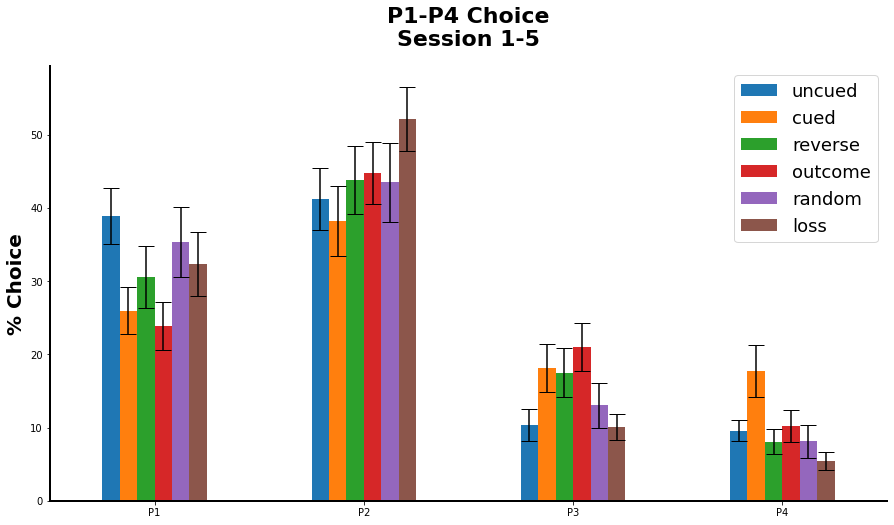

In [13]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


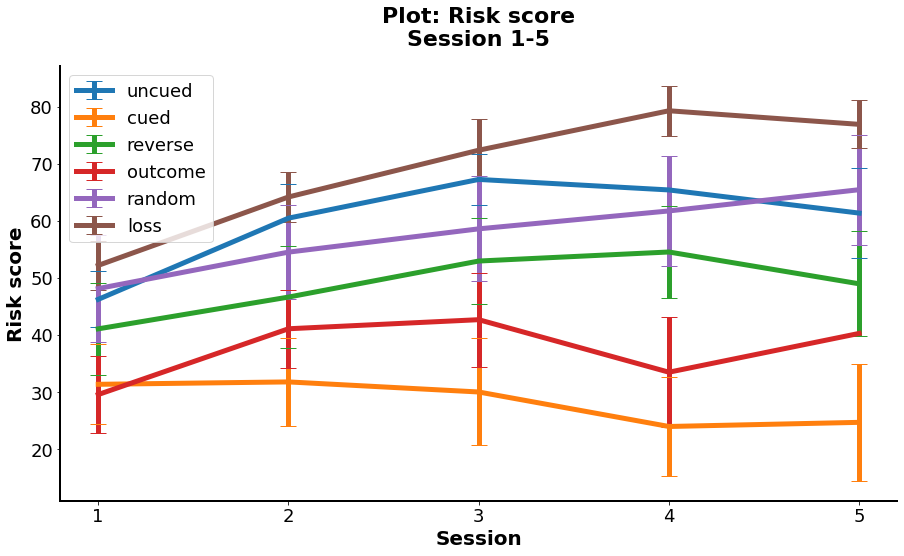

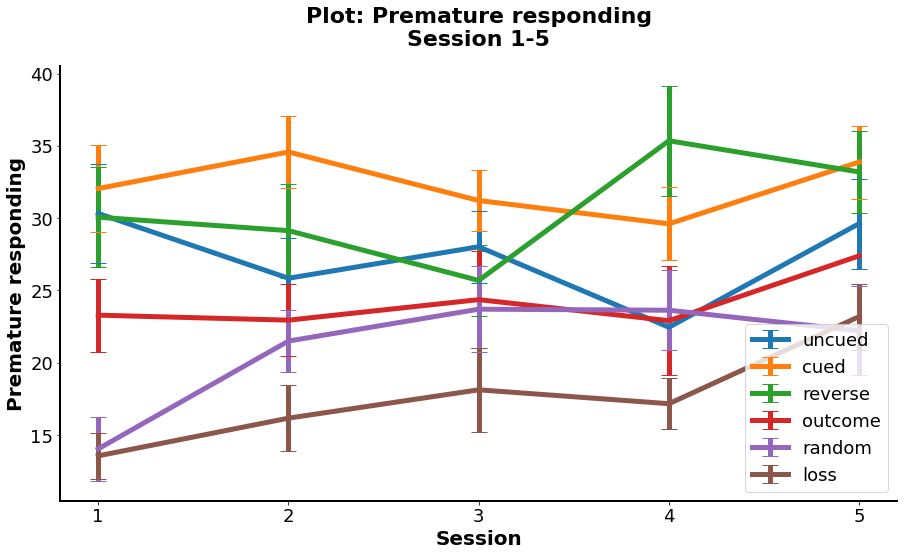

In [15]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 
plt.savefig('rgt variants - risk score S1-5',facecolor = 'white')

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



In [ ]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')